## Ex.1 Visualizing data from "Titanic" dataset

*3 points*

This exercise is based on dataset from the legendary [Kaggle](kaggle.com) Titanic ML competition avaiable [here](https://www.kaggle.com/competitions/titanic/overview).

Data and their description can be downloaded from [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).




#### 1.1 Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 Import the dataset from [here](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv')
df=df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 1.3  Set PassengerId as the index

In [3]:
PassengerId=list(range(1,891))

df=df.set_index('PassengerId')

#### 1.4 Create a pie chart presenting the male/female proportion

* for all passangers
* for surviving passengers

What is your conclusion?


<AxesSubplot:ylabel='Sex'>

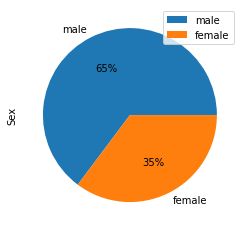

In [4]:
df_sex=df.groupby('Sex')
df_male = df_sex.get_group('male')
# df_male.head()
df_female=df_sex.get_group('female')
# df_female.head()
x=len(df_male)
y=len(df_female)

new=pd.DataFrame({
    'Sex':[x,y],
},
    index=['male','female']
)

plot=new.plot.pie(y='Sex',autopct='%1.0f%%')
plot

#### 1.5. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

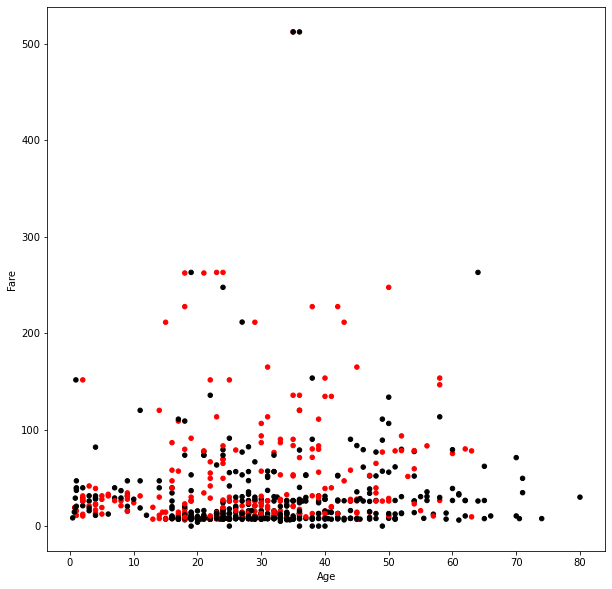

In [5]:
colors = {'female': 'red' , 'male':'black'}
p1=df.plot.scatter(x='Age',y='Fare',c=df['Sex'].map(colors),figsize=(10,10))
# p1.df_female.plot.scatter(x='Age',y='Fare',c='black',figsize=(10,10))
# p1.figsize(50,50)

Which chart would be more clear in your opinion?

In [6]:
#  Scatter plot

#### 1.6 How many men older 45 survived?

In [7]:
count=0
for x in df_male['Age']:
    if x>45:
        count=count+1
count        

73

#### 1.7  Create a histogram with the Fare payed

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

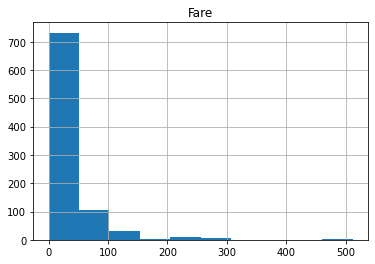

In [8]:
df.hist('Fare')

#### 1.8 Сreate your own chart that you think would be useful

<AxesSubplot:title={'center':'Class used by female'}, ylabel='class'>

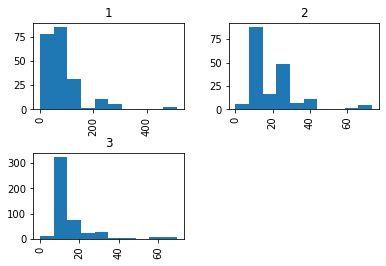

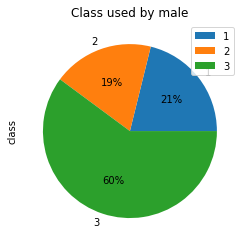

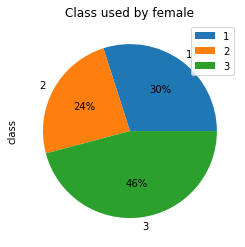

In [9]:
df_pclass=df.groupby('Pclass')
df_p1=df_pclass.get_group(1)
df_p2=df_pclass.get_group(2)
df_p3=df_pclass.get_group(3)
df['Fare'].hist(by=df['Pclass'])

# This is a histogram between different class and fare
# df.plot(x='Pclass',y='Sex')
x=df_male['Pclass'].value_counts()[1]
y=df_male['Pclass'].value_counts()[2]
z=df_male['Pclass'].value_counts()[3]
newdf=pd.DataFrame({
    'class':[x,y,z],
},
    index=['1','2','3']
)
newdf.plot.pie(y='class',autopct='%1.0f%%', title='Class used by male')

xx=df_female['Pclass'].value_counts()[1]
yy=df_female['Pclass'].value_counts()[2]
zz=df_female['Pclass'].value_counts()[3]
newdf2=pd.DataFrame({
    'class':[xx,yy,zz],
},
    index=['1','2','3']
)
newdf2.plot.pie(y='class',autopct='%1.0f%%', title='Class used by female')


So, I hope this simple exercise did not cause you any difficulties. Time to move on to the next task. There is no longer any instruction on what charts to draw. You must decide for yourself

## Ex.2 Visualizing data from "Hose Prices" dataset

*7 points*

With 79 independent variables describing (nearly) every aspect of residential buildings in Ames, Iowa, this competition challenges you to predict the final price of each home.

In the very first step of your analysis, you need to
1. define the type of variab-les
2. visualize data
3. which variables do you think would be useful to transform?

The data and their description are [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
dff= pd.read_csv('https://raw.githubusercontent.com/Aman-2002/HW2_dataAnalysis/main/train.csv')
dff

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [20]:
type(dff)

pandas.core.frame.DataFrame

In [13]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [21]:
y=dff.columns
x=dff.dtypes
x

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [22]:
inttype=[]
objtype=[]
tt=-1 
for i in x:
    tt=tt+1
#     print(i.type)

    if i.type== x[0].type:
        inttype.append(y[tt]) ;

In [16]:
# y

In [23]:
yy=['MSSubClass',  'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',  'TotalBsmtSF', 
    '1stFlrSF', '2ndFlrSF','GrLivArea',  'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd',  'GarageArea',  'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 'Age of house']
# this is the area which affect more in sali=e price

In [24]:
saleprice=dff['SalePrice']
X_axis=dff['LotArea']
# fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)



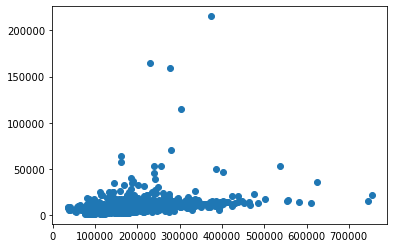

In [25]:
plt.scatter(saleprice,X_axis)

In [27]:
dff['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

E:\CONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'seaborn' from 'E:\\CONDA\\lib\\site-packages\\seaborn\\__init__.py'>

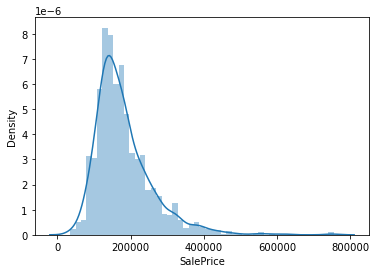

In [30]:
sns.distplot(dff['SalePrice'])
sns

In [31]:
dff['ExterQual'].describe()

count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object

<AxesSubplot:xlabel='count', ylabel='ExterQual'>

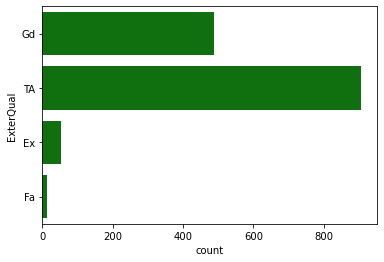

In [32]:
sns.countplot(y = 'ExterQual', data = dff, color = 'green')